In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Import the dataset
dataset = pd.read_csv('Position_Salaries.csv')

In [23]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [24]:
X = dataset.iloc[:,1:2].values
Y = dataset.iloc[:,2].values

In [25]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [26]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [27]:
from sklearn.svm import SVR

In [28]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = regressor.predict(6.5)

In [30]:
y_pred

array([ 130001.55760156])

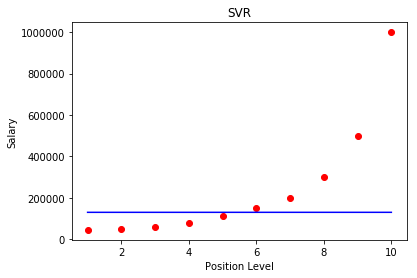

In [31]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,regressor.predict(X),color = 'blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Note:之所以效果如此糟糕，是因为sklearn模型中的SVR未加入feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

In [37]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [38]:
#不过这个是预测scale后的值
y_pred = regressor.predict(6.5)

In [39]:
y_pred

array([ 0.01158103])

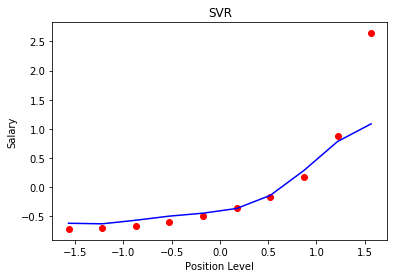

In [40]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,regressor.predict(X),color = 'blue')
plt.title('SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

最后一个值可视为outlier

In [45]:
#需要考虑各种scale的情况，以及inverse_transform
y_pred = sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([6.5]))))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [46]:
y_pred

array([ 170370.0204065])